In [4]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
source("../../stimATAC_analyses_code/R/utils.R")
source("../../stimATAC_analyses_code/R/optMatching_functions.R")

Loading required package: survival

The optmatch package has an academic license. Enter relaxinfo() for more information.



In [5]:
set.seed(42)
getwd()

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Lymphoid/code"

In [6]:
coembed <- readRDS("../data/coembed/coembed.annotation.Rds")
coembed

An object of class Seurat 
159644 features across 3473 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

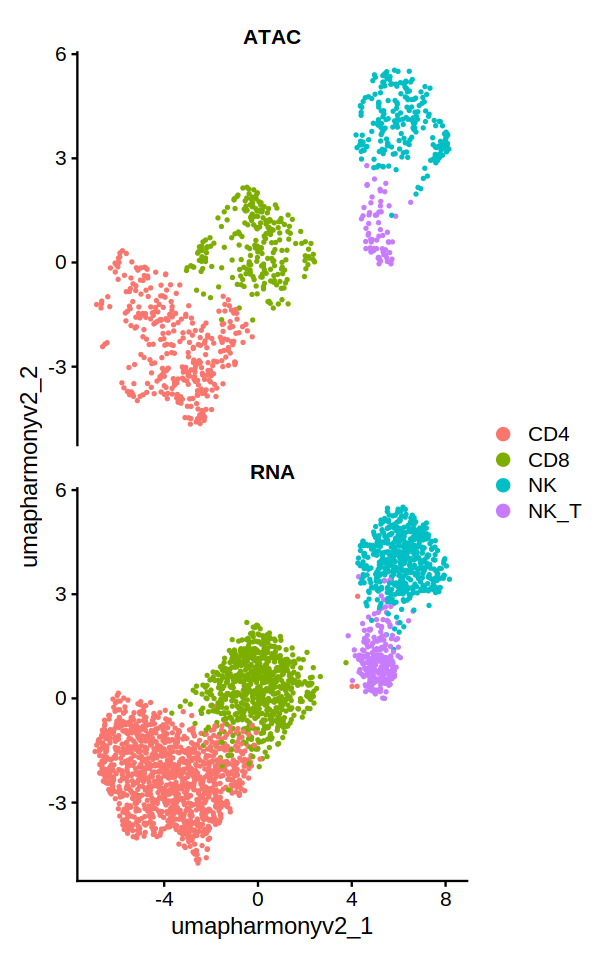

In [17]:
options(repr.plot.height = 8, repr.plot.width = 5)

DimPlot(coembed, reduction = "umap_harmony_v2", split.by = "tech", ncol = 1)

In [10]:
obj.atac <- subset(coembed, tech == "ATAC")
obj.rna <- subset(coembed, tech == "RNA")
obj.atac
obj.rna

An object of class Seurat 
159644 features across 858 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

An object of class Seurat 
159644 features across 2615 samples within 3 assays 
Active assay: RNA (28933 features, 2000 variable features)
 2 other assays present: peaks, GeneActivity
 5 dimensional reductions calculated: pca, umap, harmony, umap_harmony, umap_harmony_v2

In [11]:
head(coembed@reductions$umap_harmony_v2@cell.embeddings)

,umapharmonyv2_1,umapharmonyv2_2
CK171#TCACCACAGCCATCAT-1,-5.888304,0.2745222957
CK171#GAGACTTGTAAGCCGA-1,-5.927584,-0.0001392452
CK171#GACCCAGCATTTAGGC-1,1.464547,1.2412228496
CK171#AAGGTTCGTCGCTACG-1,1.284936,1.3666586788
CK171#AATGGCTGTTACGAAA-1,-2.395964,-4.2649993984
CK171#AAAGATGAGCCTGTAT-1,1.338868,1.0405821712


In [12]:
cca_umap_df <- as.data.frame(coembed@reductions$umap_harmony_v2@cell.embeddings)
colnames(cca_umap_df) <- c("UMAP1", "UMAP2")
head(cca_umap_df)

,UMAP1,UMAP2
,<dbl>,<dbl>
CK171#TCACCACAGCCATCAT-1,-5.888304,0.2745222957
CK171#GAGACTTGTAAGCCGA-1,-5.927584,-0.0001392452
CK171#GACCCAGCATTTAGGC-1,1.464547,1.2412228496
CK171#AAGGTTCGTCGCTACG-1,1.284936,1.3666586788
CK171#AATGGCTGTTACGAAA-1,-2.395964,-4.2649993984
CK171#AAAGATGAGCCTGTAT-1,1.338868,1.0405821712



Attaching package: ‘igraph’


The following object is masked from ‘package:FNN’:

    knn


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘pracma’


The following objects are masked from ‘package:magrittr’:

    and, mod, or


The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu






Constructing KNN graph for computing geodesic distance ..
Computing graph-based geodesic distance ..
# KNN subgraphs detected:
 2 
Visualizing subgraph for cells based on original CCA UMAP coords provided..
Skipping subgraphs with either ATAC/RNA cells fewer than:  50  ..
Pairing cells for subgraph No. 1 
Total ATAC cells in subgraph:  571 
Total RNA cells in subgraph:  1923 
Subgraph size:  571 
Search threshold being used:  229 
[1] "Constructing KNN based on geodesic distance to reduce search pairing search space"
[1] "Number of cells being paired: 571 ATAC and 571  RNA cells"
Determing pairs through optimized bipartite matching ..
Assembling pair list ..
Finished!
Pairing cells for subgraph No. 2 
Total ATAC cells in subgraph:  287 
Total RNA cells in subgraph:  692 
Subgraph size:  287 
Search threshold being used:  115 
[1] "Constructing KNN based on geodesic distance to reduce search pairing search space"
[1] "Number of cells being paired: 287 ATAC and 287  RNA cells"
Determin

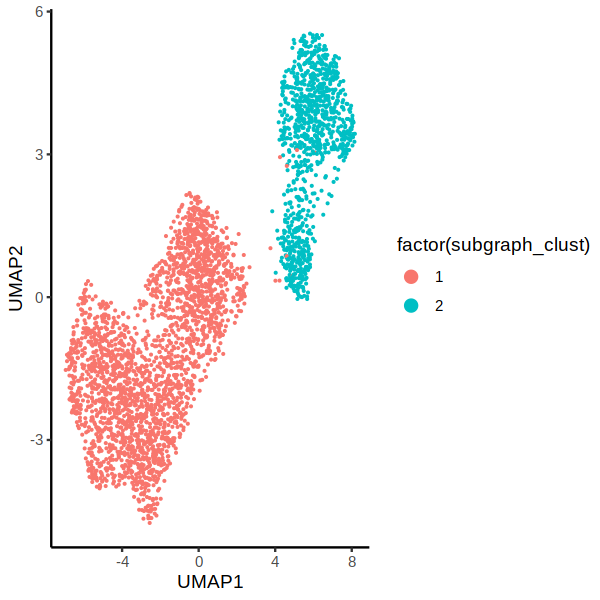

In [13]:
df_cell_pairing <- cell_pairing(ATACpcs = obj.atac@reductions$harmony@cell.embeddings,
                               RNApcs = obj.rna@reductions$harmony@cell.embeddings,
                               cca_umap_df = cca_umap_df,
                               nCores = 50)

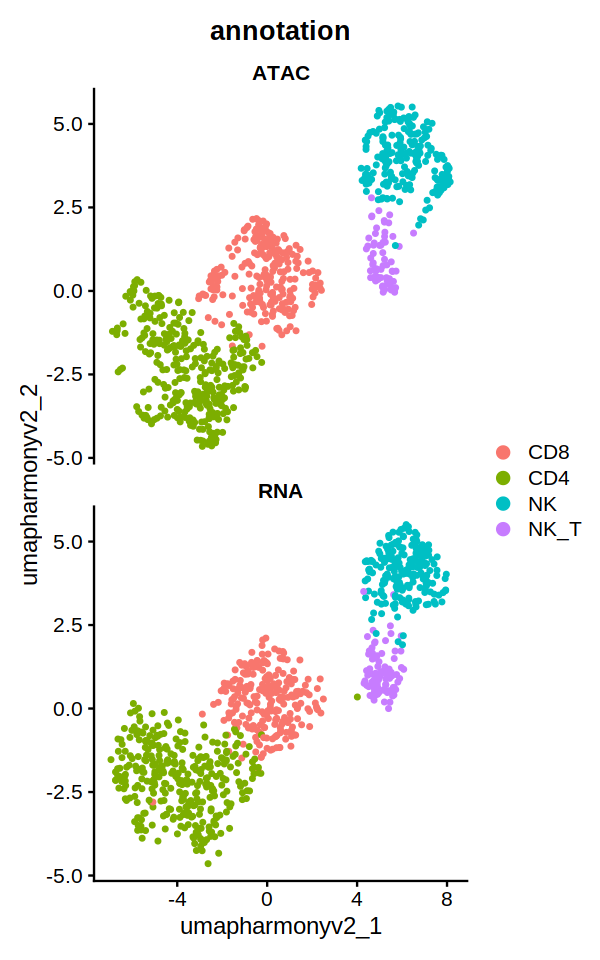

In [18]:
sel_cells <- c(df_cell_pairing$ATAC, df_cell_pairing$RNA)
coembed.sub <- coembed[, sel_cells]

options(repr.plot.height = 8, repr.plot.width = 5)
DimPlot(coembed.sub, reduction = "umap_harmony_v2", group.by = "annotation", split.by = "tech",
       ncol = 1)

In [ ]:
saveRDS(df_cell_pairing, "../data/coembed/ATAC_RNA_matching.rds")

In [ ]:
sessionInfo()